## 1. 问题描述 

## 2. 数学建模（第一版）

考虑 $6\times 6$ 人的教室，每位同学坐标为 $(i,j)$, 其中 $1\leq i,j\leq 6$。我们记 $t$ 时刻 $(i,j)$ 位置的同学发出的音量为 $a_{i,j}(t)$, 它们是时间 $t$ 的函数。

位置 $(i,j)$ 的同学在 $(t+1)$ 时刻发出的音量取决于两个因素

1. 环境音量 $b_{i,j}(t)$：若环境音量大，则同学声音大；若环境音量小，则同学声音小。
2. 随机波动：每位同学发出的声音受到随机因素波动。
 

对$(i,j)$位置的同学
1. 其环境音量我们使用邻近同学音量的平均值计算 $$b_{i,j}(t)=\frac{\sum_{-1\leq m,n\leq 1}a_{i+m,j+n}(t)}{9}$$
2. 随机因素，即对每个 $(i,j)$ 我们生成一个无限长的随机序列 $c_{i,j}(t)$，取值于$(0.05,1.05)$ 之间。
3. 其综合影响为 $$a_{i,j}(t+1)=b_{i,j}(t)\cdot c_{i,j}(t)$$

我们将绘制教室总音量随时间的演化图$$S(t)=\sum_{1\leq i,j\leq 6} a_{i,j}(t)$$

In [125]:
import random
import matplotlib.pyplot as plt

In [126]:
a = np.zeros((8,8))
b = np.zeros((8,8))
c = np.zeros((8,8))
random.seed(1)

In [127]:
def gen_c():
    for i in range(1,7): 
       for j in range(1,7):
           c[i,j]=round(random.uniform(0.05,2.05),2)

In [128]:
def gen_b():
    for i in range(1,7):
        for j in range(1,7):
            b[i,j]=0
            for i1 in range(-1,2):
                for j1 in range(-1,2):
                   b[i,j]=b[i,j]+a[i+i1,j+j1]
            b[i,j]=b[i,j]/9

In [129]:
def gen_a():
    for i in range(1,7):
        for j in range(1,7):
            a[i,j]=b[i,j]*c[i,j]

In [147]:
def rec_a(): # 计算a的平均音量
    x=0
    for i in range(1,7):
        for j in range(1,7):
            x=x+a[i,j]
    x=x/36
    return(x)

In [131]:
gen_c()

In [132]:
a = c

In [141]:
rec = list()
steps = 3000

In [142]:
for t in range(1,steps):
    gen_c()
    gen_b()
    gen_a()
    rec.append(rec_a())

In [143]:
len(rec)

2999

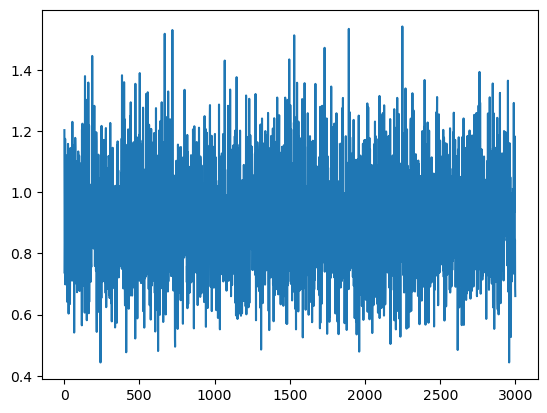

In [144]:
plt.plot(range(1,steps),rec)

## 3. 数学建模（第二版） 

我们
- 用 $f_n(t)$ 表示 $t$ 时刻第 $n$ 人发出的声响，正常嘈杂环境为 $1$
- 在狭小的教室中，假设声音无衰减，所有人听到的噪音相同，为 $F(t)=\frac{1}{n}\sum_{i=1}^n f_i(t)$
- 用 $g_n(t)$ 表示 $t$ 时刻第 $n$ 人的发言意愿，均值为$1$, 在$[0,2]$ 间平滑变化。
- 用 $h(x)$ 表示 $t$ 时刻前一小段时间，环境音量的均值 $x$ 对其说话声音的影响。
    - 这里 $x$ 可以取为前 3 个时间颗粒中听到音量 $F$ 的均值，$$x(t)=\frac{F(t)+F(t-1)+F(t-2)}{3}.$$
    - 我们希望 $x$ 在任意点迭代后趋于$1$, 例如可以取 $h=\sqrt{x}$
- 用 $k(x)$ 表示声音变化对其影响，假设声音变化平均变化率$$y(t)=x(t)-x(t-3)$$
- 通过“警戒值”，警觉带“宽度”控制
    - 急速骤减，使人闭口不言 $x<-n-m$, 比警戒值下降还快
    - 缓慢减小，略微放低声音 $|x-n|\leq m$
    - 减小或增大，不造成影响 $x>-n+m$
- 发出声响为 $$f_n(t)=g_n(t)\cdot h(x(t))\cdot k(y(t))+0.001g_n(t)$$
- 听到声响为 $$F(t)=\overline{g}(t)\cdot h(x(t))\cdot k(y(t))+0.001\overline{g}(t)$$

In [158]:
import matplotlib.pyplot as plt
import numpy as np
import random

In [236]:
steps = 1000
num = 40
random.seed(1)
f = list()
F = list()
x = list()

In [237]:
def k(x):
    if x>=0:
        return x/(1+x)
    else:
        return x/(1-x)

In [239]:
def g(t):
    return k(50*(np.sin(t*np.sqrt(2))+np.cos(t*np.sqrt(3))+np.sin(t*np.sqrt(5))+np.cos(t*np.sqrt(7))))+1

In [ ]:
for i in range(0,steps):
    for j in range(0,num):
        f=g(t+random.uniform(1,20))*k(x)